In [1]:
import seaborn as sns
sns.scatterplot(data=data_frame,x="x_variable",y="y_variable")

NameError: name 'data_frame' is not defined

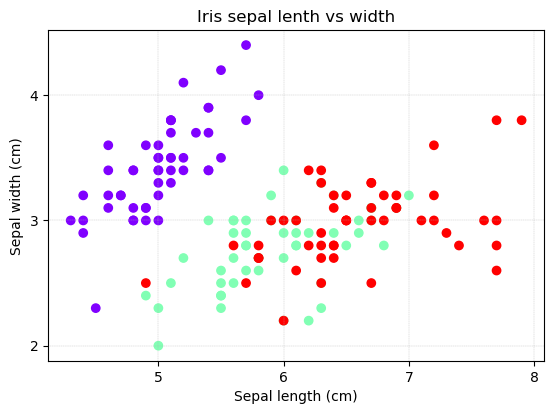

In [17]:
import matplotlib.pyplot as plt
#导入加载鸢尾花数据集的函数 数据大都用类似字典的格式存储
from sklearn.datasets import load_iris
import numpy as np

#加载鸢尾花数据集
iris=load_iris()

#提取花萼长度和宽度作为变量
#使用索引进行数据提取,取第0索引的全部数据(第一列)
#:表示所有行 0代表这些行中的值的第一个值 代表第一列
sepal_length=iris.data[:,0]
#所有行的第二个值,第二列
sepal_width=iris.data[:,1]
#返回三个目标变量的标签 有150个数的数列,但是分别有50个0,1,2组成,表示不同的花
target=iris.target

fig,ax=plt.subplots()

#创建散点图 全局形式,自动在ax上创建,和ax.scatter同样的道理
#函数需要前两个作为参数,后面的都是可选参数(有默认值)
#c这里接受了颜色数组,将会根据颜色数组的值进行配置颜色 c可以是一个值,也可以是数组,如果是数组将会按照数组的值对应上点进行配色
ax.scatter(sepal_length,sepal_width,c=target,cmap='rainbow')

#添加标题和轴坐标
plt.title('Iris sepal lenth vs width')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

#设置横纵轴刻度
ax.set_xticks(np.arange(4,8+1,step=1))
ax.set_yticks(np.arange(1,5+1,step=1))

#设置横纵轴尺度为1:1
#scaled是预定义参数 函数会检查字符串的值,然后匹配到对应值所对应的行为 是字典中配置的一个行为
ax.axis('scaled')

#增加刻度长度,颜色为浅灰 可以用ls和lw和c代替变量名
ax.grid(ls='--',lw=0.25,c=[0.7,0.7,0.7])

#设置横纵轴范围 
ax.set_xlim()
ax.set_ylim()

plt.show()

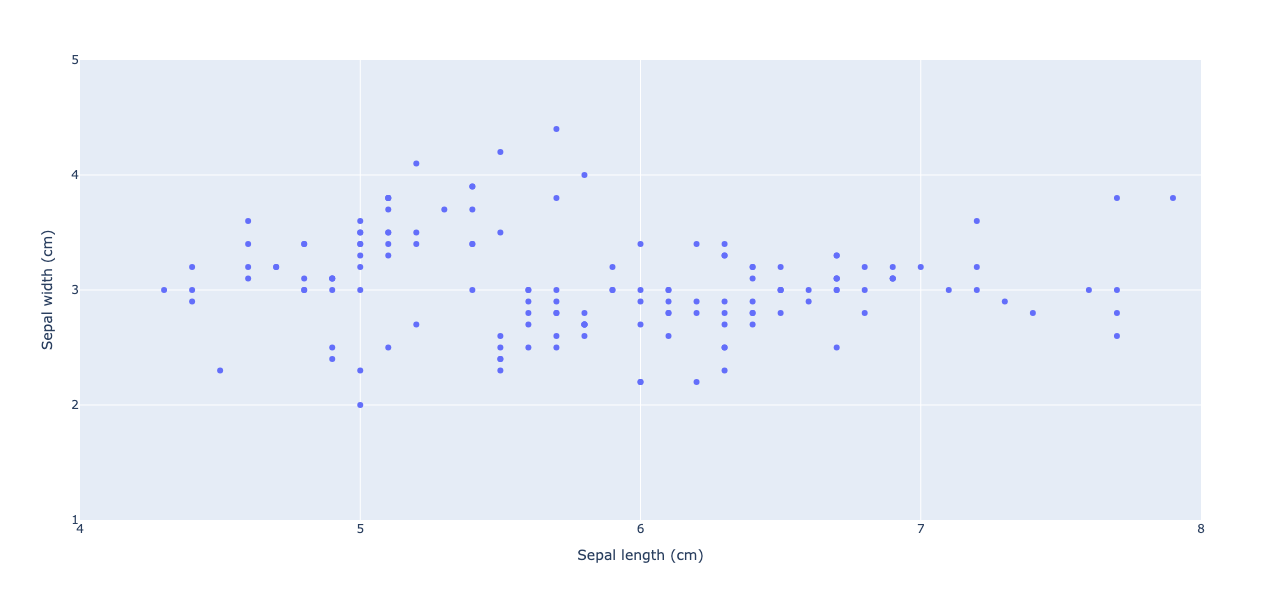

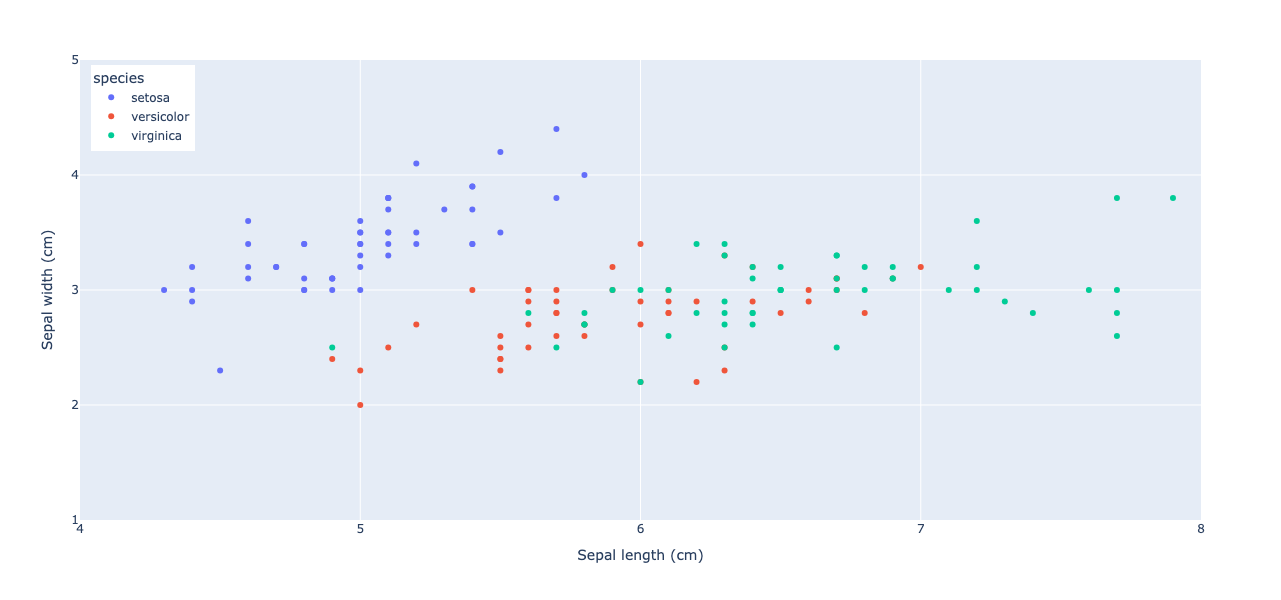

In [29]:
import numpy as np
import plotly.express as px

#从ploly导入鸢尾花书样本数据
#数据类似于表格
iris_df=px.data.iris()

#绘制散点图,不渲染marker
#这里的xy表示提取到的表格的标题下的数据.然后指定宽高
fig=px.scatter(iris_df,x="sepal_length",y="sepal_width",
               width=600,height=600,
               #配置两个标签
               labels={"sepal_length":"Sepal length (cm)",
                       "sepal_width": "Sepal width (cm)"})

#修饰图像
#配置范围
fig.update_layout(xaxis_range=[4,8],yaxis_range=[1,5])
#预先生成刻度数字
xticks=np.arange(4,8+1)
yticks=np.arange(1,5+1)
#配置刻度样式字典包含了配置对应轴的配置方式
#dict是创造字典的键值对,然后传递到外部方法 
fig.update_layout(xaxis = dict(tickmode = 'array',
                               tickvals = xticks))
fig.update_layout(yaxis = dict(tickmode = 'array',
                               tickvals = yticks))

fig.show()

#绘制分类的散点图
#能绘制不同颜色是因为color根据数据中的'species'进行绘制不同颜色
fig = px.scatter(iris_df,x="sepal_length",y="sepal_width",
                 color="species",
                 width=600,height=600,
                 labels={"sepal_length":"Sepal length (cm)",
                         "sepal_width": "Sepal width (cm)"})

#修饰图像
fig.update_layout(xaxis_range=[4,8],yaxis_range=[1,5])
fig.update_layout(xaxis=dict(tickmode='array',
                             tickvals=xticks))
fig.update_layout(yaxis=dict(tickmode='array',
                             tickvals=yticks))

#绘制图例在左上角anchor表示定位方式xy的anchor表示xy怎么定位,
#这里y表示垂直,x为水平,top表示垂直锚点为顶部 表示上边缘对应y
#left表示左边缘对应x
#0.99表示对应了全部绘图的上部分的99%
#0.01表示x的0.01

fig.update_layout(legend=dict(yanchor="top",y=0.99,
                              xanchor="left",x=0.01))
fig.show()

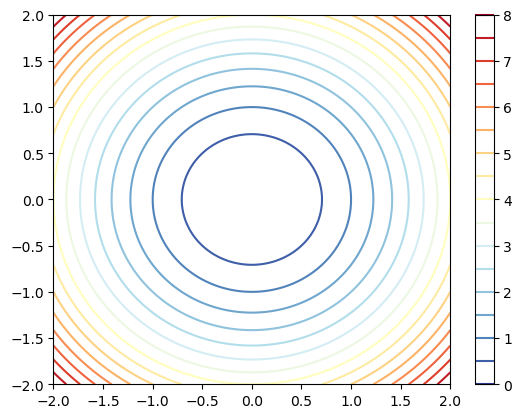

In [37]:
import matplotlib.pyplot as plt
import numpy as np

#创建二维数据
x=np.linspace(-2,2,100)
y=np.linspace(-2,2,100)
X,Y=np.meshgrid(x,y)
Z=X**2+Y**2

#linspace是左闭右闭[]生成数据16表示有16个段
plt.contour(X,Y,Z,levels=np.linspace(0,8,16+1),cmap='RdYlBu_r')
plt.colorbar()
plt.show()

In [41]:
a=np.linspace(0,8,16)
print(a)

[0.         0.53333333 1.06666667 1.6        2.13333333 2.66666667
 3.2        3.73333333 4.26666667 4.8        5.33333333 5.86666667
 6.4        6.93333333 7.46666667 8.        ]


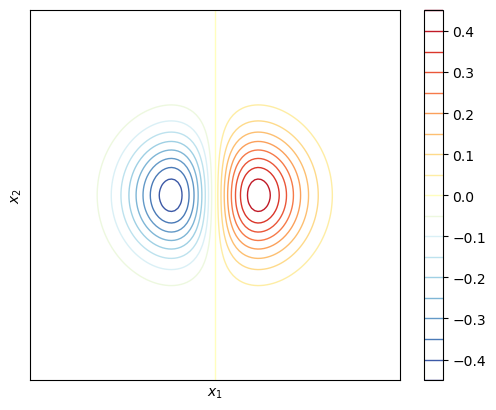

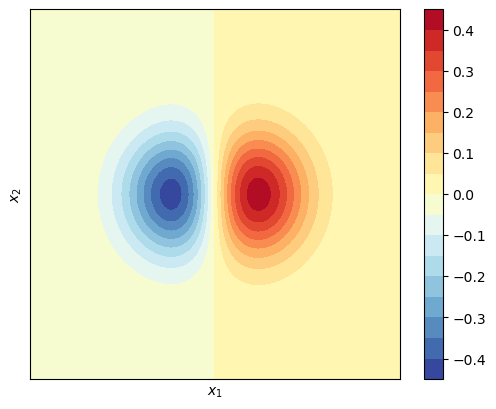

In [54]:
import numpy as np
import matplotlib.pyplot as plt

x1_array=np.linspace(-3,3,121)
x2_array=np.linspace(-3,3,121)

xx1,xx2=np.meshgrid(x1_array,x2_array)
ff=xx1*np.exp(-xx1**2-xx2**2)

#等高线图
fig,ax=plt.subplots()

CS=ax.contour(xx1,xx2,ff,levels=20,
              cmap='RdYlBu_r',linewidths=1)

fig.colorbar(CS)
ax.set_xlabel(r'$\it{x_1}$');ax.set_ylabel(r'$\it{x_2}$')
ax.set_xticks([]);ax.set_yticks([])
ax.set_xlim(xx1.min(),xx1.max())
ax.set_ylim(xx2.min(),xx2.max())
ax.grid(False)
ax.set_aspect('equal',adjustable='box')

#填充等高线
fig,ax=plt.subplots()

CS=ax.contourf(xx1,xx2,ff,levels=20,
               cmap='RdYlBu_r')
fig.colorbar(CS)
ax.set_xlabel(r'$\it{x_1}$');ax.set_ylabel(r'$\it{x_2}$')
ax.set_xticks([]);ax.set_yticks([])
ax.set_xlim(xx1.min(),xx1.max())
ax.set_ylim(xx2.min(),xx2.max())
ax.grid(False)
ax.set_aspect('equal',adjustable='box')


In [77]:
import numpy as np
import plotly.graph_objects as go

x1_array=np.linspace(-3,3,121)
x2_array=np.linspace(-3,3,121)

xx1,xx2=np.meshgrid(x1_array,x2_array)
ff=xx1*np.exp(-xx1**2 - xx2**2)

#等高线等级配置,间隔为0.05 是闭区间
levels=dict(start=-0.5,end=0.5,size=0.05)

data=go.Contour(x=x1_array,y=x2_array,z=ff,
                contours_coloring='lines',#等高线着色方式
                line_width=2,
                colorscale='RdYlBu_r',
                contours=levels)
#创建布局
layout=go.Layout(
    width=600,
    height=600,
    xaxis=dict(title=r'$x_1$'),#传递字典覆盖默认值,但是不会覆盖字典导致之前的字典数据丢失
    yaxis=dict(title=r'$x_2$'))

#lay也是字典,这是层层嵌套的
fig=go.Figure(data=data,layout=layout)

fig.show()

<Axes: >

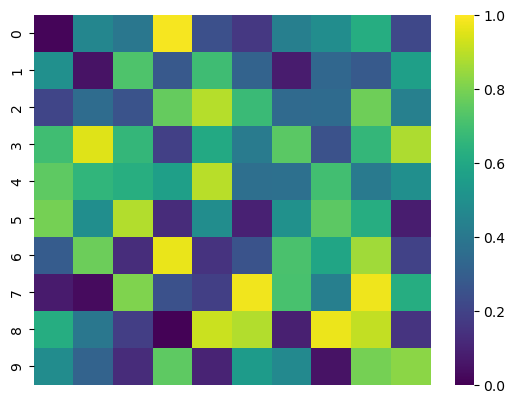

In [101]:
import seaborn as sns
import numpy as np

#形成10*10的二维随机数组,生成的随机韩苏范围是[0,1)
data=np.random.rand(10,10)
sns.heatmap(data,vmin=0,vmax=1,
            cmap='viridis',
            annot=False,
            xticklabels=False,
            yticklabels=True)

<Axes: >

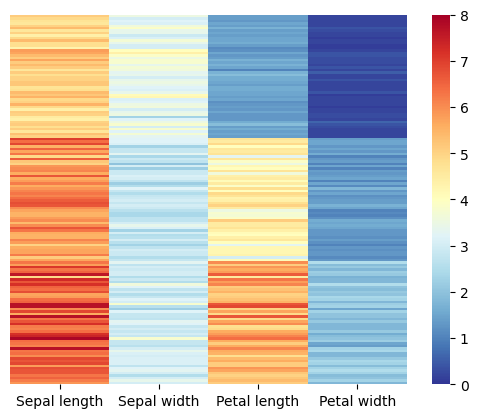

In [126]:
import matplotlib.pyplot as plt
#其他库缩写可能为sb这里为了区别sb取了sns
import seaborn as sns

iris_sns=sns.load_dataset("iris")

fig,ax=plt.subplots()

#选择了所有行和,但是除了最后一列的数据,根据索引

sns.heatmap(data=iris_sns.iloc[:,0:-1],
            vmin=0,vmax=8,
            ax=ax,
            yticklabels=False,
            xticklabels=['Sepal length','Sepal width',
                         'Petal length','Petal width'],
            cmap='RdYlBu_r')

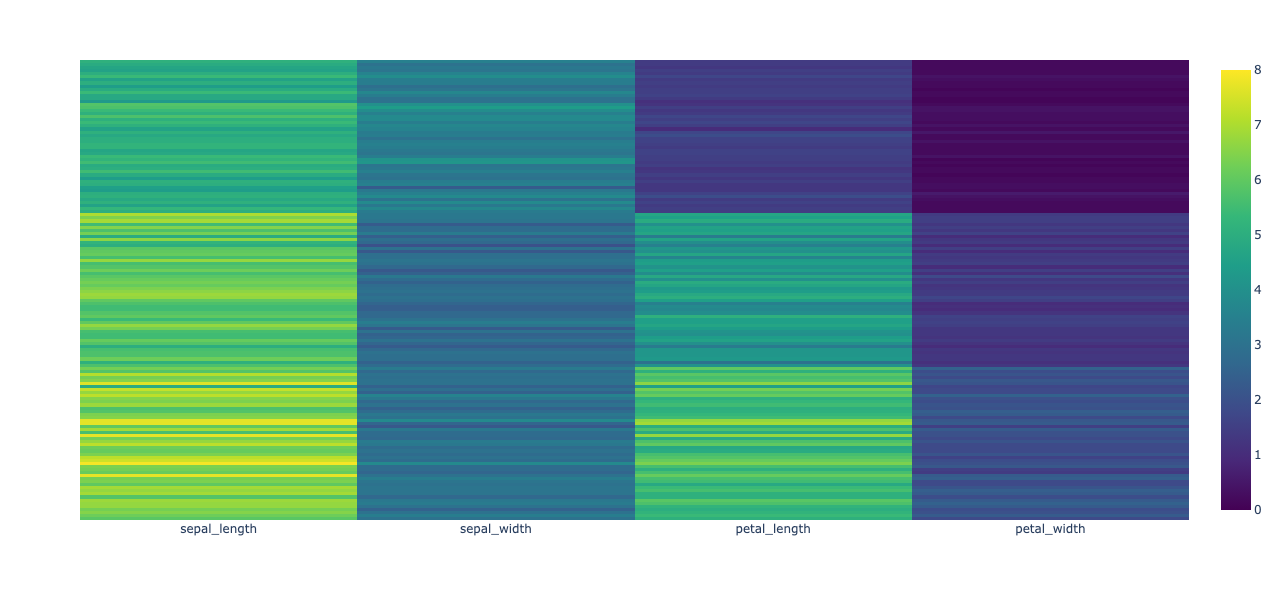

In [148]:
import matplotlib.pyplot as plt
import plotly.express as px

#也是类似表格的帧数据
df = px.data.iris()

#多了一列分类标签,所以是=2 这里使用了iloc切片函数
fig=px.imshow(df.iloc[:,0:-2],text_auto=False,
              width=600,height=600,
              #这里x不配置x标签,后面自行配置
              x=None,zmin=0,zmax=8,
              color_continuous_scale='viridis')

#指定标签模式为数组,为空表示不生成刻度标签,没有刻度标签就是不显示
fig.update_layout(yaxis=dict(tickmode='array',tickvals=[]))

x_labels=['Sepal length','Sepal width',
          'Petal length','Petal width']
x_ticks=list(range(len(x_labels)))
#刻度标签显示模式为数组 这里vals为数组的索引,后面的text为对应索引的数据
fig.update_xaxes(tickmode='array',tickvals=x_ticks,
                 #指定对应x轴上的刻度的文本
                 ticktext=x_labels)

fig.show()

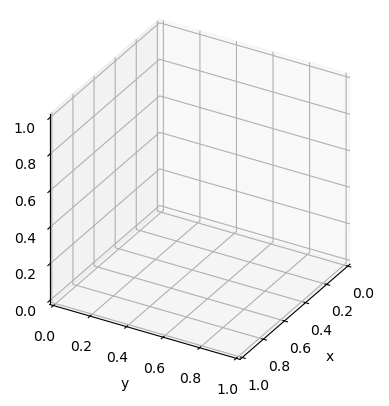

In [154]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#正交投影
ax.set_proj_type('ortho')

ax.view_init(elev=30,azim=30)

ax.set_box_aspect([1,1,1])

#显示的坐标轴不是空间中坐标轴的位置,需要根据数值判断原点位置和坐标轴方向
plt.show()

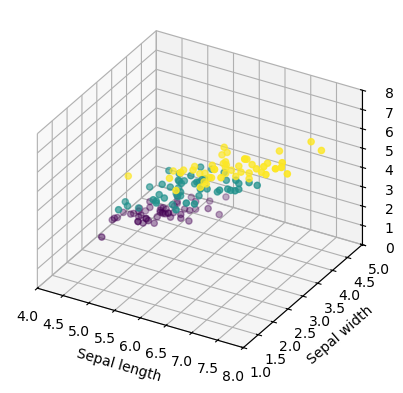

In [158]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris=datasets.load_iris()
X=iris.data[:,:3]
y=iris.target

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2],c=y)

#配置坐标轴标签
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Sepal length')

ax.set_xlim(4,8);ax.set_ylim(1,5);ax.set_zlim(0,8)
ax.set_proj_type('ortho')

plt.show()

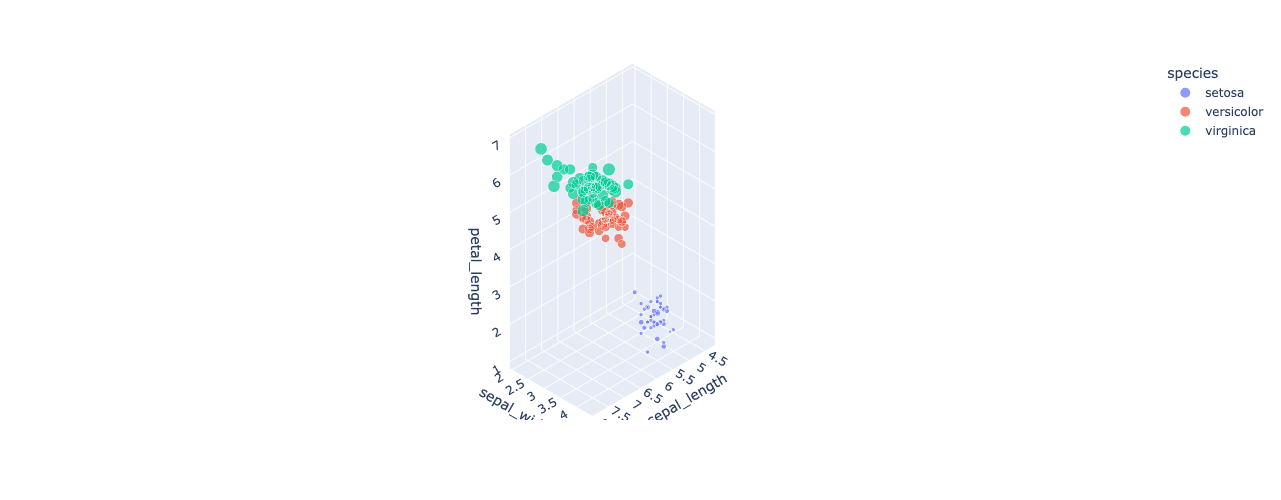

In [162]:
import plotly.express as px
df=px.data.iris()
fig=px.scatter_3d(df,
                  x='sepal_length',
                  y='sepal_width',
                  z='petal_length',
                  size='petal_width',#控制散点大小,这里散点大小用了自身的值映射
                  color='species')

fig.update_layout(autosize=False,width=500,height=500)
fig.layout.scene.camera.projection.type="orthographic"#调整摄像机位置 这里为正交视图,数据不会因为透视效果忽大忽小
fig.show()

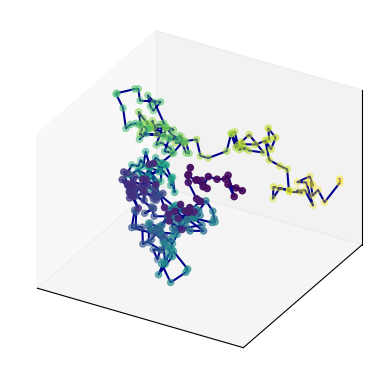

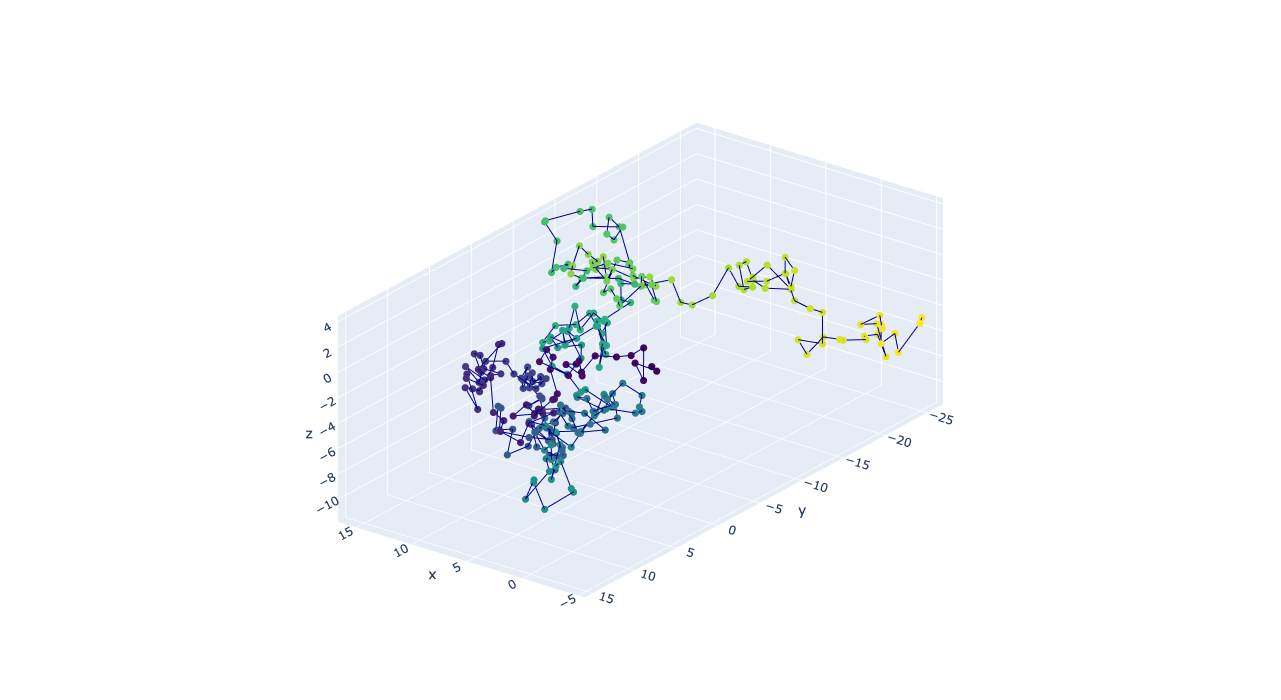

In [180]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

#生成随机游走数据
num_steps=300
t=np.arange(num_steps)
#基础的正态分布 standard_normal为标准正太分布,均值为0,标准差为1,输入的数仅仅为个点的意思(这里为步数)
x=np.cumsum(np.random.standard_normal(num_steps))
y=np.cumsum(np.random.standard_normal(num_steps))
z=np.cumsum(np.random.standard_normal(num_steps))

#使用matplotlib可视化
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

#默认的plot是连线图
ax.plot(x,y,z,color='darkblue')
ax.scatter(x,y,z,c=t,cmap='viridis')

ax.set_xticks([]);ax.set_yticks([]);ax.set_zticks([])
ax.set_proj_type('ortho')
ax.view_init(elev=30,azim=120)
plt.show()

#用Plotly可视化
fig=go.Figure(data=go.Scatter3d(
    x=x,y=y,z=z,
    marker=dict(size=4,color=t,colorscale='Viridis'),
    line=dict(color='darkblue',width=2)))

fig.layout.scene.camera.projection.type="orthographic"
fig.update_layout(width=800,height=700)
fig.show()

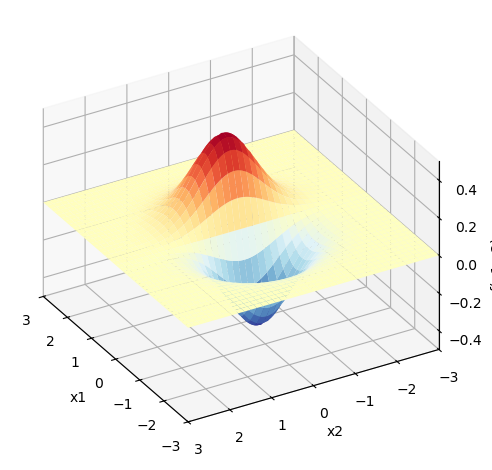

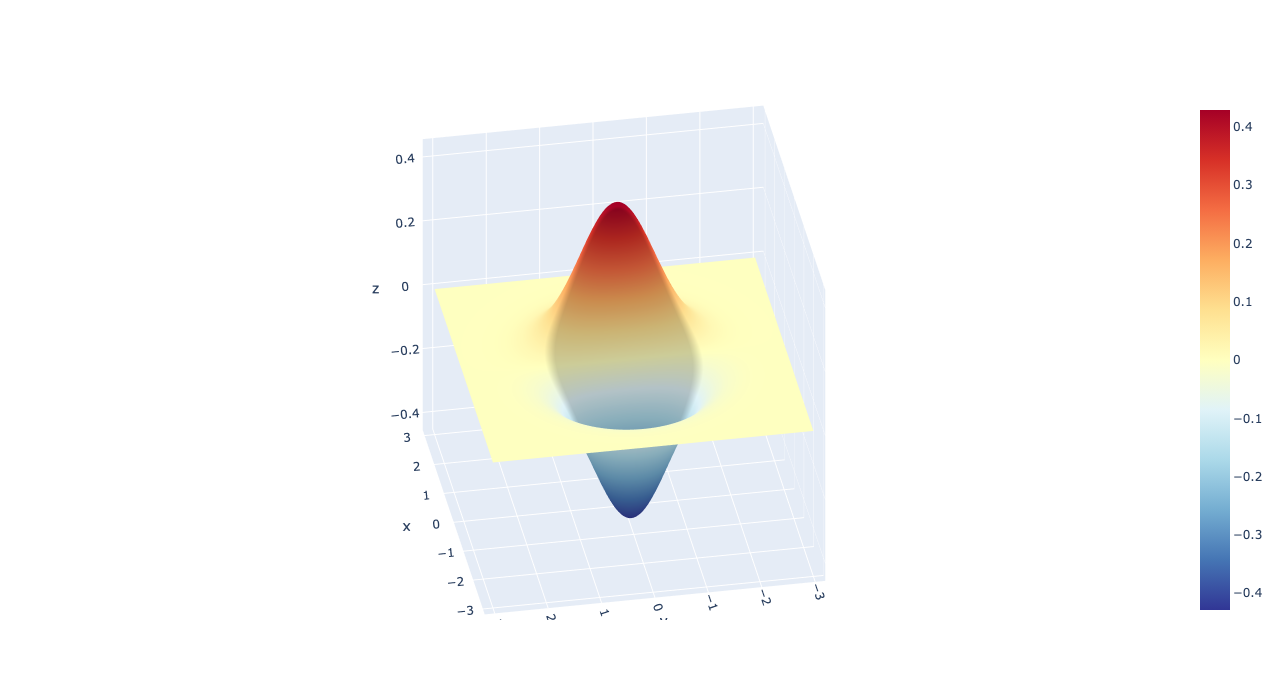

In [186]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

#生成曲面数据
x1_array=np.linspace(-3,3,121)
x2_array=np.linspace(-3,3,121)

xx1,xx2=np.meshgrid(x1_array,x2_array)
ff=xx1*np.exp(-xx1**2-xx2**2)

#mat的可视化
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(xx1,xx2,ff,cmap='RdYlBu_r')

#设置坐标轴
ax.set_xlabel('x1');ax.set_ylabel('x2');ax.set_zlabel('f(x1,x2)')
#设置坐标轴取值范围
ax.set_xlim(-3,3);ax.set_ylim(-3,3);ax.set_zlim(-0.5,0.5)
ax.set_proj_type('ortho')
ax.view_init(elev=30,azim=150)
plt.tight_layout()
plt.show()


#使用plotly绘制
#plot中data是必须的,这里前面仅仅知道是配置了绘图的容器,没有数据源,这里数据源带有了绘图的布局样式
fig=go.Figure(data=[go.Surface(z=ff,x=xx1,y=xx2,
                               colorscale='RdYlBu_r')])
fig.layout.scene.camera.projection.type="orthographic"
fig.update_layout(width=800,height=700)
fig.show()

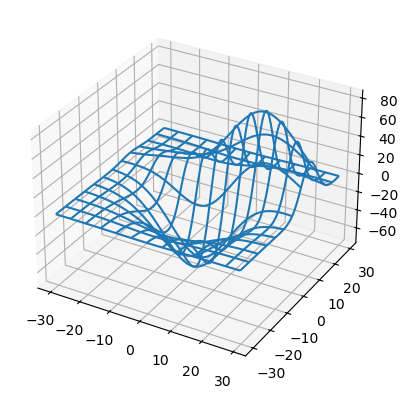

In [190]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

fig=plt.figure()
ax=fig.add_subplot(projection='3d')

X,Y,Z=axes3d.get_test_data(0.05)

ax.plot_wireframe(X,Y,Z,rstride=10,cstride=10)

plt.show()

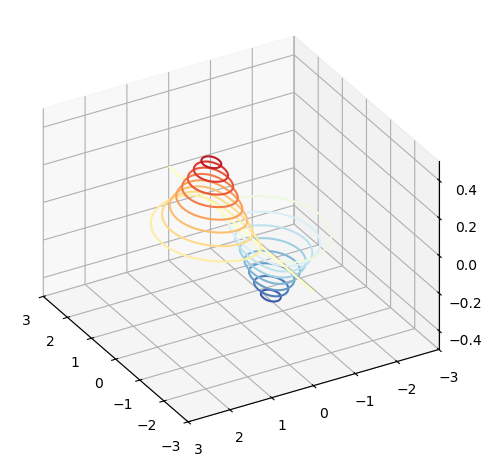

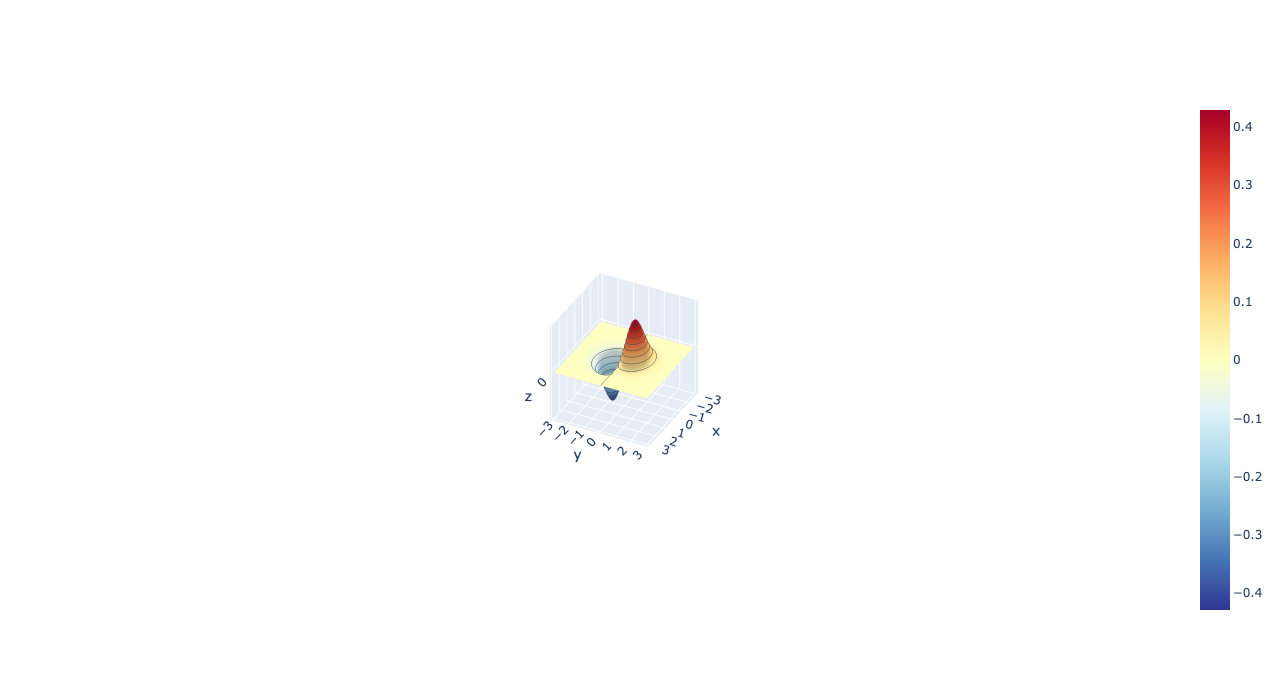

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

x1_array=np.linspace(-3,3,121)
x2_array=np.linspace(-3,3,121)
xx1,xx2=np.meshgrid(x1_array,x2_array)
ff=xx2*np.exp(-xx1**2-xx2**2)

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.contour(xx1,xx2,ff,cmap='RdYlBu_r',levels=20)

ax.set_xlim(-3,3);ax.set_ylim(-3,3);ax.set_zlim(-0.5,0.5)
ax.set_proj_type('ortho')

ax.view_init(elev=30,azim=150)
plt.tight_layout()
plt.show()

#配置z轴的等高线字典来显示特定样式
contour_settings={"z":{"show":True,"start":-0.5,
                      "end":0.5,"size":0.05}}
fig=go.Figure(data=[go.Surface(x=xx1,y=xx2,z=ff,
                               colorscale='RdYlBu_r',
                               contours=contour_settings)])
fig.layout.scene.camera.projection.type="orthographic"
fig.update_layout(width=800,height=700)
fig.show()

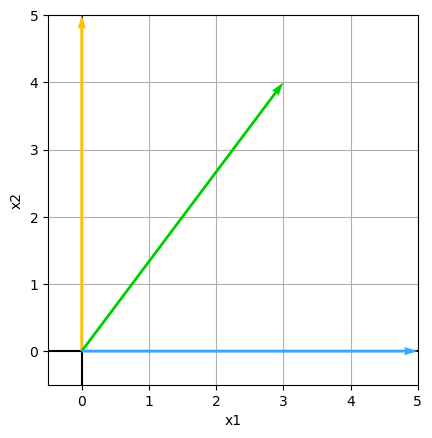

In [205]:
#绘制二维向量图
import matplotlib.pyplot as plt

A=[[0,5],
   [3,4],
   [5,0]]

def draw_vector(vector,RBG):
    #0,0为起始坐标,vector的0和1代表x和y的值 angles表示xy轴的角度展示
    #scale _ units 表示按照什么坐标轴进行缩放 缩放比例为1 color为接受的参数
    #zorder为艺术家图层序号 前面的z表示z轴上的绘制顺序,1e5表示100000 数值越大越小钱
    plt.quiver(0,0,vector[0],vector[1],angles='xy',
               scale_units='xy',scale=1,color=RBG,
               zorder=1e5)

fig,ax=plt.subplots()
v1=A[0]
draw_vector(v1,'#FFC000')
v2=A[1]
draw_vector(v2,'#00CC00')
v2=A[2]
draw_vector(v2,'#33A8FF')

#绘制垂直线和水平线延长成标记线,颜色为黑色
ax.axvline(x=0,c='k')
ax.axhline(y=0,c='k')
#配置标签
ax.set_xlabel('x1')
ax.set_ylabel('x2')
#显示网格
ax.grid()
#保持等比例 box表示天工程绘图大小为刚刚好(包住需要的绘图)
#aspect表示比例缩放关系这里指的是xy的比例
ax.set_aspect('equal',adjustable='box')
#配置范围
ax.set_xbound(lower=-0.5,upper=5)
ax.set_ybound(lower=-0.5,upper=5)

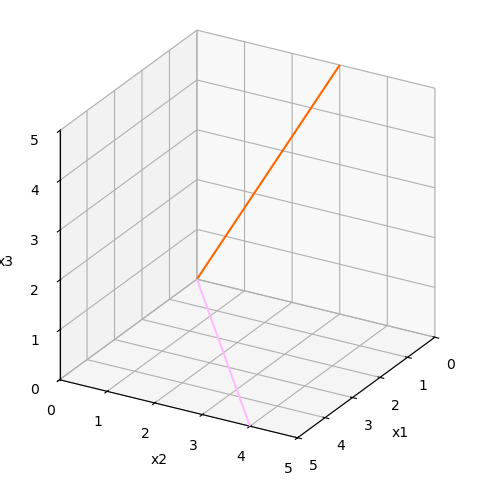

In [211]:
#绘制三维箭头图
def draw_vector_3D(vector,RBG):
    #表示起始值为0,0,0  餐食表示xyz上的分量
    plt.quiver(0,0,0,vector[0],vector[1],vector[2],
               arrow_length_ratio=0,color=RBG,
               zorder=1e5)

#6,6代表长宽都为6英寸
fig=plt.figure(figsize=(6,6))
#ortho表示正交
ax=fig.add_subplot(111,projection='3d',proj_type='ortho')

#这里在原数据中使用索引位置代表一个向量,可以理解为一列为一个向量
#先遍历A的所有行,row会依次提取所有行(每一个大的索引)再使用row[0]筛选出行中索引为0的数字添加到新的数列中
v_1=[row[0] for row in A]
draw_vector_3D(v_1,'#FF6600')

v_2=[row[1] for row in A]
draw_vector_3D(v_2,'#FFBBFF')

ax.set_xlim(0,5)
ax.set_ylim(0,5)
ax.set_zlim(0,5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
#配置方位角和仰角
ax.view_init(azim=30,elev=25)
ax.set_box_aspect([1,1,1])